In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
final = pd.read_excel("/content/drive/MyDrive/관광공모전/data/2018.xlsx")

In [5]:
df = final.copy()
df.head()

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1,Q3A1,Q3A2,Q3A3,...,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY
0,1,NaN,NaN,NaN,NaN,NaN,NaN,① 한국만 방문,NaN,NaN,...,프 랑 스,남 성,31 - 40 세,여 가/위 락/ 휴 식,개 별 여 행,1 회,처 음 방 문,0.258338,프랑스,보르도(Bordeaux)
1,1,가족/ 친지,NaN,NaN,NaN,NaN,4.0,① 한국만 방문,NaN,NaN,...,중 국,남 성,51 - 60 세,여 가/위 락/ 휴 식,개 별 여 행,1 회,처 음 방 문,1.497972,중국,광둥(광동성)
2,6,NaN,NaN,NaN,NaN,NaN,NaN,① 한국만 방문,NaN,NaN,...,중 국,여 성,21 - 30 세,여 가/위 락/ 휴 식,개 별 여 행,4 회 이 상,재 방 문,1.806581,중국,쑤저우(소주)
3,2,NaN,NaN,NaN,NaN,NaN,NaN,① 한국만 방문,NaN,NaN,...,중 국,여 성,21 - 30 세,여 가/위 락/ 휴 식,개 별 여 행,2 회,재 방 문,1.609837,중국,창춘(장춘)
4,3,친구/ 연인,NaN,NaN,NaN,NaN,2.0,① 한국만 방문,NaN,NaN,...,중 국,여 성,31 - 40 세,여 가/위 락/ 휴 식,개 별 여 행,3 회,재 방 문,1.872946,중국,샹하이(상해)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16469 entries, 0 to 16468
Columns: 410 entries, Q1 to CITY
dtypes: float64(195), int64(4), object(211)
memory usage: 51.5+ MB


In [8]:
df['CITY'].unique()

array(['보르도(Bordeaux)', '광둥(광동성)', '쑤저우(소주)', ..., '랑방시',
       '상조제두스캄포스/사호 호세도스캄포스', '쿠라시키'], dtype=object)

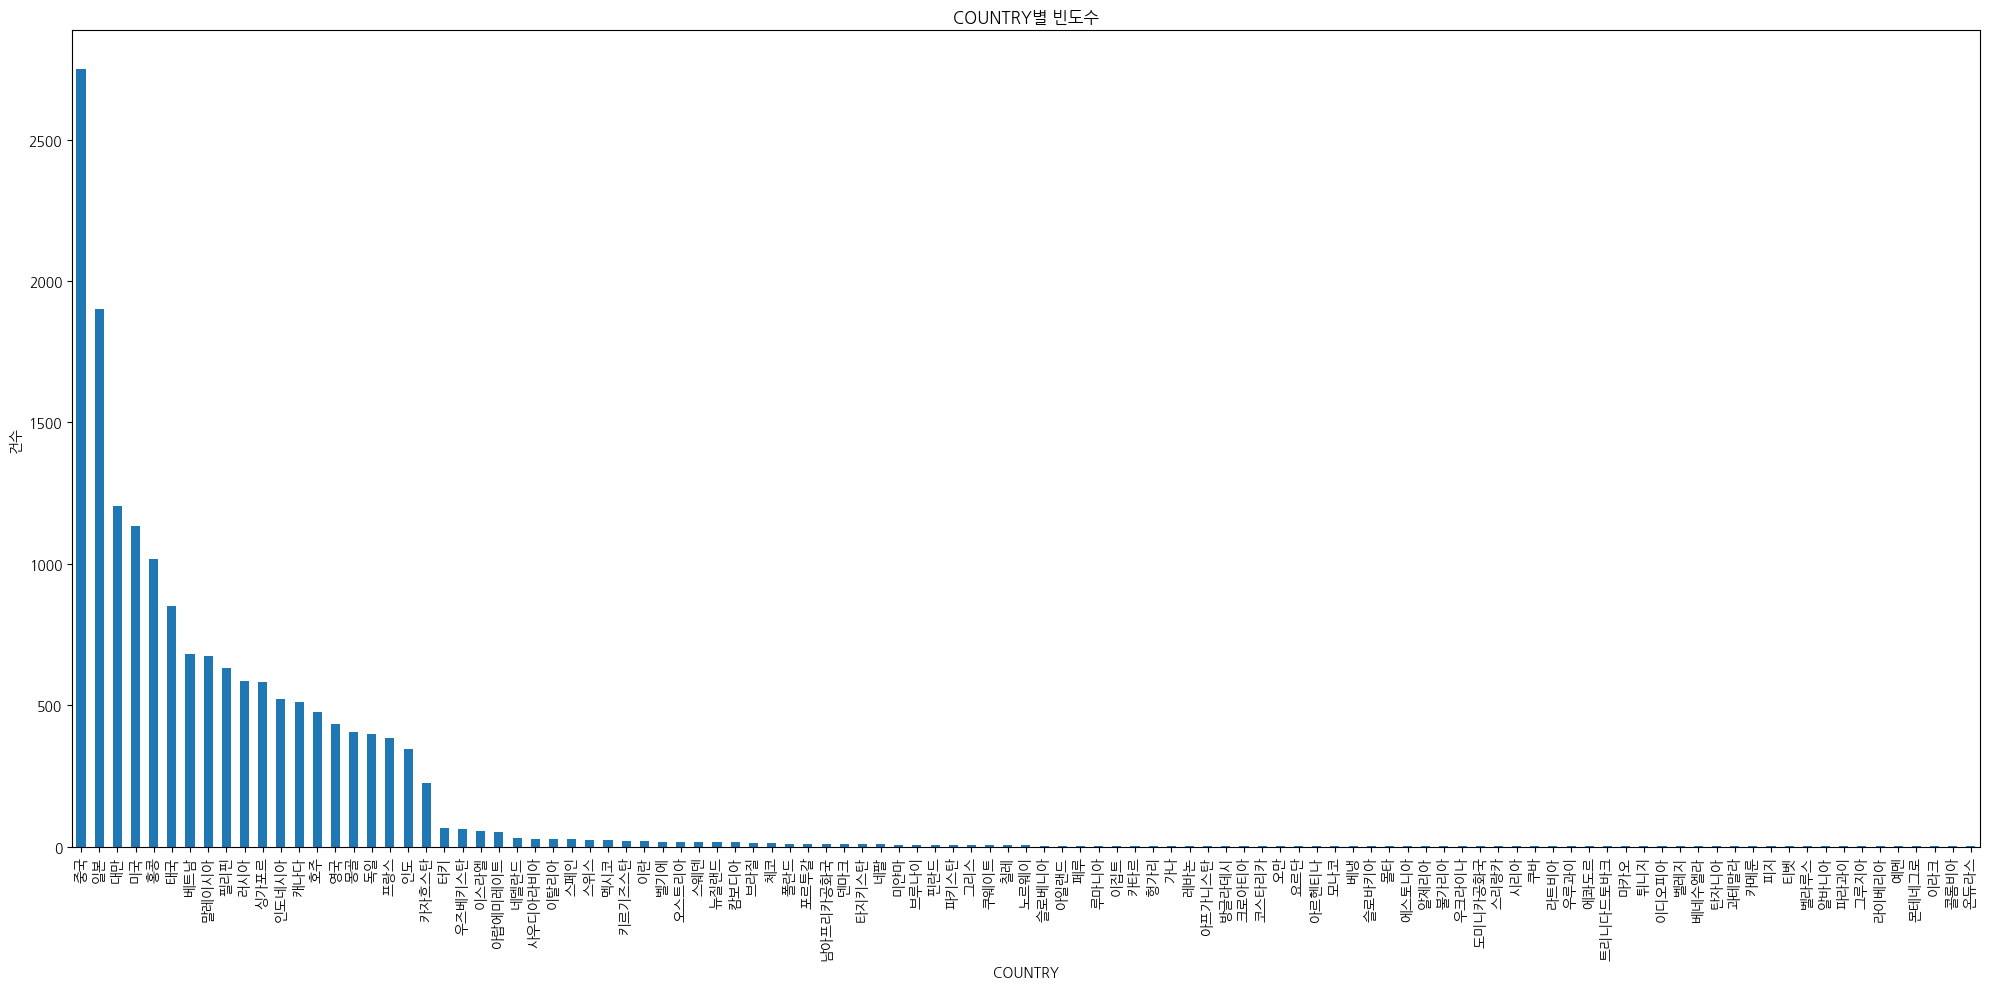

In [12]:
import matplotlib.pyplot as plt

df['COUNTRY'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('COUNTRY별 빈도수')
plt.xlabel('COUNTRY')
plt.ylabel('건수')
plt.xticks(rotation=90)  # 국가 이름이 길 경우 회전
plt.tight_layout()
plt.show()

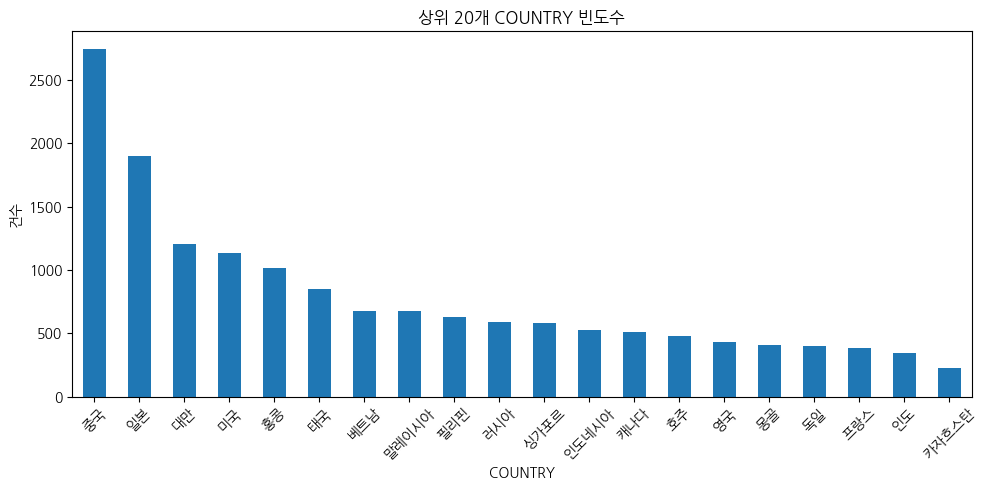

In [17]:
df['COUNTRY'].value_counts().head(20).plot(kind='bar', figsize=(10, 5))
plt.title('상위 20개 COUNTRY 빈도수')
plt.xlabel('COUNTRY')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
counts_q3 = {
    'Q3A1': df['Q3A1'].value_counts(),
    'Q3A2': df['Q3A2'].value_counts(),
    'Q3A3': df['Q3A3'].value_counts(),
    'Q3A4': df['Q3A4'].value_counts()
}


In [24]:
import pandas as pd

# 데이터 병합
df_counts = pd.DataFrame(counts_q3).fillna(0).astype(int)

# 인덱스를 문자열로 변환 (예: 응답 코드)
df_counts.index = df_counts.index.astype(str)

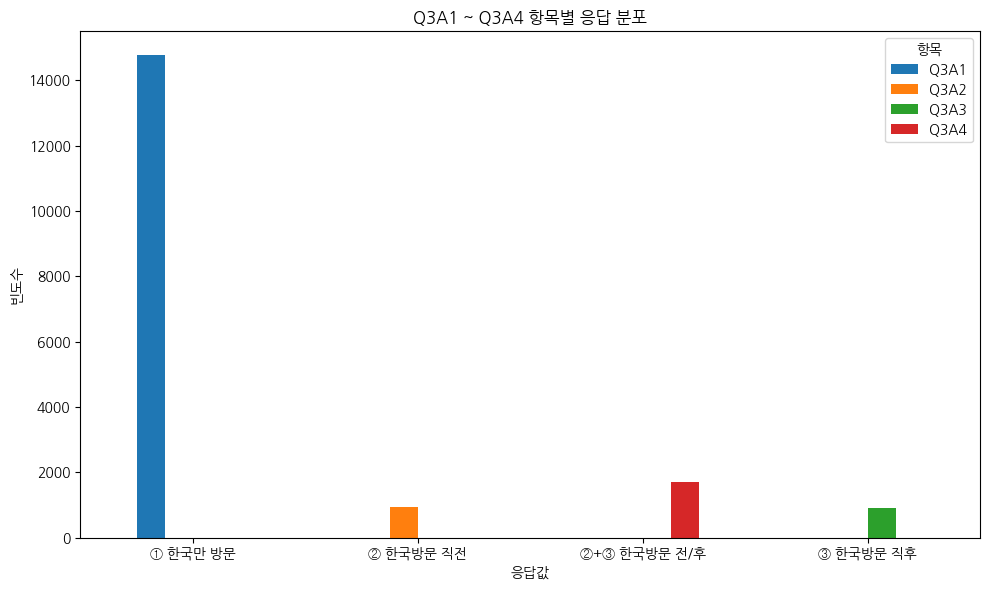

In [25]:
import matplotlib.pyplot as plt

df_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Q3A1 ~ Q3A4 항목별 응답 분포')
plt.xlabel('응답값')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.legend(title='항목')
plt.tight_layout()
plt.show()


In [26]:
df['Q4'].unique()

array(['처음부터 한국을 목적지로 선정했다', '다른 국가와 비교한 후 한국을 목적지로 선정했다'], dtype=object)

<ipython-input-33-2068554617>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Q4', palette=['blue', 'red'])


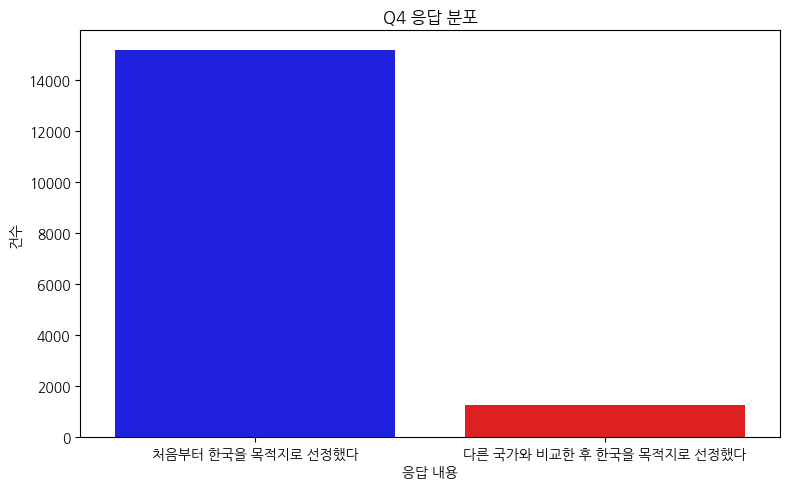

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Q4', palette=['blue', 'red'])
plt.title('Q4 응답 분포')
plt.xlabel('응답 내용')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
cols = ['Q4_1A1', 'Q4_1A2', 'Q4_1A3', 'Q4_1A4', 'Q4_1A5',
        'Q4_1A6', 'Q4_1A7', 'Q4_1A8', 'Q4_1A9', 'Q4_1A10']

In [35]:
import pandas as pd
from collections import Counter

# 모든 응답을 하나로 모으기 (결측 제거 포함)
all_answers = pd.concat([df[col] for col in cols]).dropna()

# 빈도수 계산
answer_counts = all_answers.value_counts()


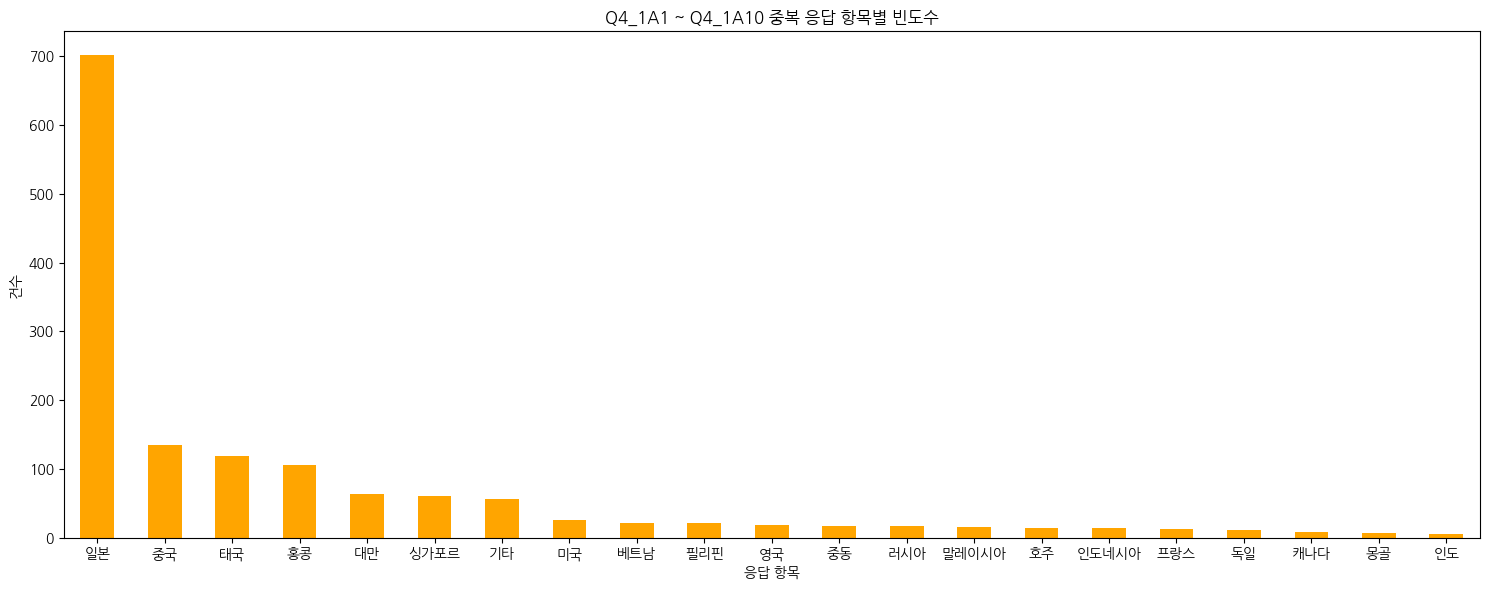

In [38]:
import matplotlib.pyplot as plt

answer_counts.plot(kind='bar', figsize=(15, 6), color='orange')
plt.title('Q4_1A1 ~ Q4_1A10 중복 응답 항목별 빈도수')
plt.xlabel('응답 항목')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
